# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


c:\Users\bruno\anaconda3\envs\study_keras\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
PATH_DATA = "../data/Passageiros.csv"


# Code

## Configurations

In [4]:
mpl.rcParams['figure.figsize']=(10,6)

## Export and view data

In [5]:
df_passengers = pd.read_csv(PATH_DATA)
df_passengers.sample(5)


,tempo,passageiros
122,1959.166667,406
59,1953.916667,201
35,1951.916667,166
63,1954.250000,227
91,1956.583333,405


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

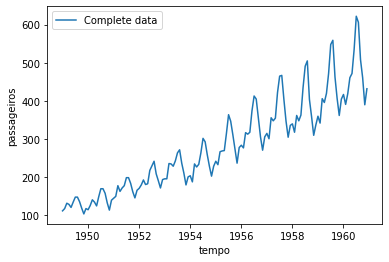

In [6]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)


## Scaler data

In [7]:
sc = StandardScaler()


In [8]:
sc.fit(df_passengers)

StandardScaler()

In [9]:
scaler_data=sc.transform(df_passengers)

In [10]:
x = scaler_data[:, 0]
y = scaler_data[:, 1]


<AxesSubplot:>

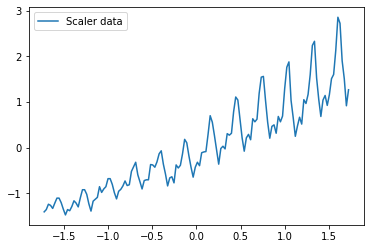

In [11]:
sns.lineplot(
    x=x,
    y=y,
    label='Scaler data'
)


## Split data to train

In [12]:
data_size = len(df_passengers)
size_train = int(data_size*0.9)
size_test = data_size-size_train


In [13]:
x_train, y_train, x_test, y_test = (
    x[0:size_train], y[0:size_train], 
    x[size_train:data_size], y[size_train:data_size]
    )


<AxesSubplot:>

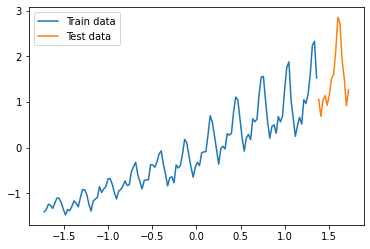

In [14]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_test,
    y=y_test,
    label='Test data'
)


## Linear regression

In [15]:
model_regression = Sequential()
model_regression.add(
    Dense(
        1,
        input_dim=1,
        kernel_initializer='Ones',
        activation='linear',
        use_bias=False
    )
)
model_regression.compile(loss='mean_squared_error', optimizer='adam')


In [16]:
model_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_regression.fit(x_train,y_train)

5/5 [==============================] - 1s 4ms/step - loss: 0.1286


In [18]:
y_predict=model_regression.predict(x_train)

5/5 [==============================] - 0s 999us/step


[Text(0.5, 1.0, 'Predict with linear regression')]

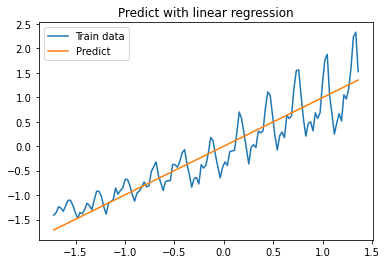

In [19]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_train,
    y=y_predict[:,0],
    label='Predict'
).set(title="Predict with linear regression")



### Back to initial values

In [20]:
df_result_linear_regression =pd.DataFrame({
    'time':x_train,
    'passengers': y_predict[:,0]
})

df_result_linear_regression.sample(5)

,time,passengers
94,0.541279,0.538837
121,1.190814,1.185441
6,-1.575723,-1.568614
42,-0.709677,-0.706475
112,0.974302,0.969906


In [21]:
df_result_linear_regression_transf = pd.DataFrame(
    sc.inverse_transform(df_result_linear_regression),
    columns=["time", "passengers"]
)
df_result_linear_regression_transf.sample(5)

,time,passengers
81,1955.750000,307.497075
78,1955.500000,298.908086
89,1956.416667,330.401046
0,1949.000000,75.594381
101,1957.416667,364.757001


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

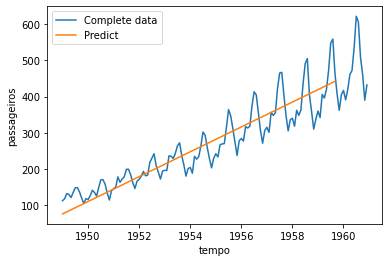

In [22]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)
sns.lineplot(
    data=df_result_linear_regression_transf,
    x='time',
    y='passengers',
    label='Predict'
)


In [23]:
y_predict_test= model_regression.predict(x_test)


1/1 [==============================] - 0s 16ms/step


In [24]:
df_result_linear_regression_test = pd.DataFrame({
    'time': x_test,
    'passengers': y_predict_test[:, 0]
})

df_result_linear_regression_test.sample(5)


,time,passengers
5,1.503553,1.496769
9,1.599780,1.592562
4,1.479496,1.472820
7,1.551666,1.544665
6,1.527609,1.520717


In [25]:
df_result_linear_regression_test_transf = pd.DataFrame(
    sc.inverse_transform(df_result_linear_regression_test),
    columns=["time", "passengers"]
)
df_result_linear_regression_test_transf.sample(5)


,time,passengers
8,1960.416667,467.824855
3,1960.000000,453.509881
12,1960.750000,479.276846
13,1960.833333,482.139858
7,1960.333333,464.961872


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

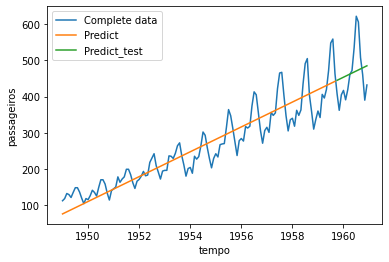

In [26]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)
sns.lineplot(
    data=df_result_linear_regression_transf,
    x='time',
    y='passengers',
    label='Predict'
)
sns.lineplot(
    data=df_result_linear_regression_test_transf,
    x='time',
    y='passengers',
    label='Predict_test'
)


## Linear regression multi fields

In [27]:
model_regression_multi_fields = Sequential(
   [ 
    Dense(
        8,
        input_dim=1,
        kernel_initializer='random_uniform',
        activation='sigmoid',
        use_bias=False
    ), 
    Dense(
        8,
        kernel_initializer='random_uniform',
        activation='sigmoid',
        use_bias=False
    ),
    Dense(
        1,
        kernel_initializer='random_uniform',
        activation='linear',
        use_bias=False
    )
    ]
)
model_regression_multi_fields.compile(loss='mean_squared_error', optimizer='adam')


In [28]:
model_regression_multi_fields.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_regression_multi_fields.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8221
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8178
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8150
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8125
Epoch 5/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8073
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8041
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8005
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7976
Epoch 9/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7955
Epoch 10/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7934
Epoch 11/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7920
Epoch 12/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7910
Epoch 13/1000
5/5 [==============================

In [30]:
y_predict = model_regression_multi_fields.predict(x_train)
y_predict_test = model_regression_multi_fields.predict(x_test)


1/1 [==============================] - 0s 16ms/step


<AxesSubplot:>

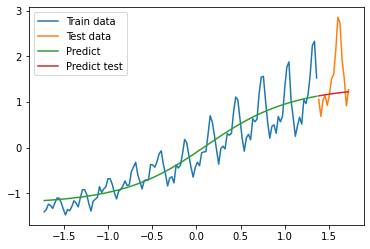

In [31]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_test,
    y=y_test,
    label='Test data'
)
sns.lineplot(
    x=x_train,
    y=y_predict[:,0],
    label='Predict'
)
sns.lineplot(
    x=x_test,
    y=y_predict_test[:, 0],
    label='Predict test'
)
